# Machine Learning: Aula 2

Nessa prática iremos abordar como implementar um classificador (multi-classe) que minimiza o Erro Quadrático Médio (em inglês, Mean Squared Error, MSE) de predições, no dataset Pap-Smear do Herlev Hospital, estudado por [1].

O dataset pode ser baixado [neste link](http://mde-lab.aegean.gr/index.php/downloads)

In [ ]:
import shutil
import numpy as np
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.utils.validation import check_X_y
from sklearn.utils.validation import check_array
from sklearn.utils.validation import check_is_fitted

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split

In [ ]:
url = "http://mde-lab.aegean.gr/images/stories/docs/smear2005.zip"
filename = "data.zip"

In [ ]:
with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

In [ ]:
!unzip -qq data.zip

In [ ]:
df = pd.read_excel('./smear2005/new_database_results.xls')

In [ ]:
df.describe()

,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,CytoShort,CytoLong,CytoElong,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,2990.826881,14053.904444,0.356610,90.490139,139.356935,52.497274,71.193455,0.750395,0.705578,118.130049,171.596531,0.691923,0.381297,201.161396,490.032579,0.274383,107.895311,86.651036,416.865867,423.703381,4.577972
std,1878.177267,20357.674179,0.213364,21.780290,25.012857,18.754784,23.242059,0.156531,0.154648,71.904552,90.183748,0.177367,0.172679,67.798197,274.857442,0.165056,57.507109,54.833614,633.817458,621.690605,1.816252
min,316.875000,467.875000,0.003990,17.913947,69.889702,13.973914,19.416488,0.307806,0.270610,29.457850,44.643029,0.210975,0.066993,60.750000,136.125000,0.003364,19.000000,13.000000,14.000000,21.000000,1.000000
25%,1599.750000,2329.000000,0.218484,76.017591,123.257682,38.929320,55.713553,0.642667,0.598836,67.732383,104.235311,0.567724,0.251712,154.250000,287.375000,0.149395,67.000000,49.000000,71.000000,85.000000,3.000000
50%,2592.250000,4891.250000,0.354828,89.201813,138.402393,50.404684,71.175839,0.762162,0.716932,93.126177,142.579802,0.696390,0.350568,199.500000,388.125000,0.242546,96.000000,74.000000,140.000000,155.000000,5.000000
75%,3976.000000,14019.875000,0.504971,103.399375,151.040909,64.771793,86.353923,0.859482,0.813543,144.291619,215.058132,0.807432,0.495136,243.375000,608.750000,0.364968,134.000000,109.000000,398.000000,421.000000,6.000000
max,10794.625000,127313.750000,0.885497,174.994651,230.486399,112.723053,158.823802,1.192308,1.135615,418.494540,571.909084,1.215871,1.071126,411.375000,1718.000000,0.903233,430.000000,432.000000,3906.000000,4000.000000,7.000000


## Recap

Na aula passada definimos um classificador linear,

$$f(\mathbf{x};\theta,b) = \theta^{T}\mathbf{x} + b$$

Note que a predição feita por $f$ é um __número real__, enquanto o valor esperado $y$ é __um valor binário__. Note que $f$ tem uma interpretação bem intuitiva: os valores $\mathbf{x}$ tais que $f(\mathbf{x}; \theta, b) = 0$ formam um __hiperplano__ em $\mathbb{R}^{n}$. Deste modo $f$ separa $\mathbb{R}^{n}$ em duas regiões, respectivamente $f(\mathbf{x};\theta, b) > 0$ e $f(\mathbf{x};\theta, b) < 0$. Assim, os pontos $\mathbf{x}$ são classificados de acordo com o lado do hiperplano que eles caem,

$$\hat{y} = \begin{cases}1 & \text{ se } f(\mathbf{x};\theta, b) > 0\\ 0 & \text{ caso contrário}\end{cases}$$

Os parâmetros $\theta$ e $b$ foram estimados usando a função de custo chamada de  __erro médio quadrático__, definido da seguinte forma,

$$MSE(\hat{\mathbf{y}}, \mathbf{y}) = \dfrac{1}{2N}\sum_{i=1}^{N}(\hat{y}_{i}-y_{i})^{2}$$

Vimos na aula anterior que os valores $\theta^{\star}$ e $b^{\star}$ que minimizam o $MSE$ são,

$$\theta^{\star} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$
$$b = \mu_{y} - \theta^{T}\mu_{\mathbf{x}}$$

### Perguntas

1. Suponha que nós modificamos a fórmula para $\hat{y}$ da seguinte maneira,

$$\hat{y} = \begin{cases}1 & \text{ se } f(\mathbf{x};\theta, b) > \tau\\ 0 & \text{ caso contrário}\end{cases}$$

Isso faz sentido? Como $\tau$ afeta o valor de $\hat{y}$?

__Respostas__

1. O valor de $\tau$ provoca um deslocamento no hiperplano que separa $\mathbb{R}^{n}$, ou mais precisamente, altera o valor do bias.

2. O valor de $\hat{y}$ será afetado pois o limiar de classificação será deslocado, alterando o resultado das amostras próximas ao hiperplano.

$$f(\mathbf{x};\theta, b) > \tau$$
$$\theta^{T}\mathbf{x} + b > \tau$$
$$\theta^{T}\mathbf{x} + b - \tau > 0$$
$$\theta^{T}\mathbf{x} + b' > 0 \text{  onde  } b' = b - \tau$$

## Classificador

In [ ]:
class MSEClassifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        # Check if X and y have compatible shape
        X, y = check_X_y(X, y)
        # Store classes seen during training
        self.classes_ = unique_labels(y)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        self.θ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.b = np.mean(y) - np.dot(self.θ.T, np.mean(X, axis=0))
        
        return self

    def predict(self, X):
        # Check if X has correct shape
        X = check_array(X)

        # Check if fit fn has been called
        check_is_fitted(self)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        yhat = 1 * (np.dot(X, self.θ) + self.b > 0.0)

        return yhat

In [ ]:
model = MSEClassifier()

In [ ]:
data = df.values

X = data[:, 1:-1].astype(float)
y_multi = data[:, -1]
y = 1 * (y_multi >= 4)

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = model.fit(Xtr, ytr)

In [ ]:
yhat = model.predict(Xts)

In [ ]:
C = np.array([['True Positive', 'False Negative'], ['False Positive', 'True Negative']])

## Matriz de Confusão

A matriz de confusão pode ser definida como uma matriz $C \in \mathbb{R}^{K \times K}$ tal que o elemento $C_{ij}$ se refere ao número de amostras que pertencem à classe $i$, e que foram preditos como sendo da classe $j$.

A partir dela, podemos definir quatro casos,

1. __True Positive:__ $C_{00}$, ou seja, amostras positivas $(y = 1)$ preditas corretamente $(\hat{y} = 1)$.
2. __False Positive:__ $C_{01}$, ou seja, amostras negativas $(y = 0)$ preditas como positivas $(\hat{y} = 1)$.
3. __False Negative:__ $C_{10}$, ou seja, amostras positivas $(y = 1)$ preditas como negativas $(\hat{y} = 0)$. 
4. __True Negative:__ $C_{11}$, ou seja, amostras negativas $(y = 0)$ preditas como negativas $(\hat{y} = 0)$.

Text(0.5, 0, 'Classe Predita')

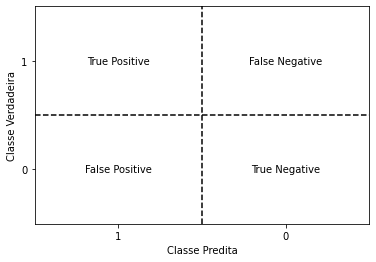

In [ ]:
_ = plt.plot([-2, 2], [0, 0], 'k--')
_ = plt.plot([0, 0], [-2, 2], 'k--')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.text(x=-1, y=1, s="True Positive", horizontalalignment='center', verticalalignment='center')
plt.text(x=1, y=1, s="False Negative", horizontalalignment='center', verticalalignment='center')
plt.text(x=-1, y=-1, s="False Positive", horizontalalignment='center', verticalalignment='center')
plt.text(x=1, y=-1, s="True Negative", horizontalalignment='center', verticalalignment='center')

plt.xticks([-1.0, 1.0], ["1", "0"])
plt.yticks([-1.0, 1.0], ["0", "1"])

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')

In [ ]:
cmat = confusion_matrix(yts, yhat)

print(cmat)

[[ 16  31]
 [  0 137]]


Text(0.5, 15.0, 'Classe Predita')

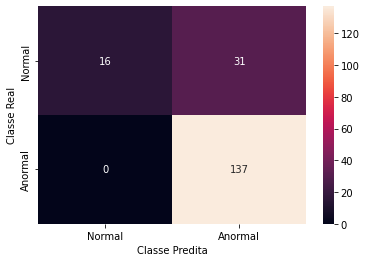

In [ ]:
ax = sns.heatmap(cmat.astype(int), annot=True, fmt='g')

_ = ax.set_xticklabels(['Normal', 'Anormal'])
_ = ax.set_yticklabels(['Normal', 'Anormal'], rotation=90)

ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')

Podemos então calcular os seguintes valores,

### True Positive Rate

$$TPR = \dfrac{TP}{P} = \dfrac{TP}{TP + FN}$$

### True Negative Rate

$$TNR = \dfrac{TN}{N} = \dfrac{TN}{TN + FP}$$

### Acurácia

$$acc = \dfrac{TN + TP}{P + N} = \dfrac{TN + TP}{TN + TP + FN + FP}$$

### Perguntas

1. Qual erro é mais sério? Predizer células normais como anormais (falso negativo), ou anormais como normais (falso positivo)? Qual causa mais prejuízos para a saúde do paciente?

__Resposta__

1. Neste exemplo, evitar falsos-negativos é mais crítico.

In [ ]:
tp = cmat[0, 0]
tn = cmat[1, 1]
fp = cmat[0, 1]
fn = cmat[1, 0]

In [ ]:
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)

print('tpr = {}, tnr = {}, acc = {}'.format(tpr, tnr, acc))

tpr = 1.0, tnr = 0.8154761904761905, acc = 0.8315217391304348


### Análise do vetor de parâmetros

Note que como as variáveis da matriz de dados $X$ tem diferentes escalas, $\theta$ tenta transformar todas essas variáveis numa escala comum. Isso pode ser visto na figura abaixo.

In [ ]:
θ = model.θ

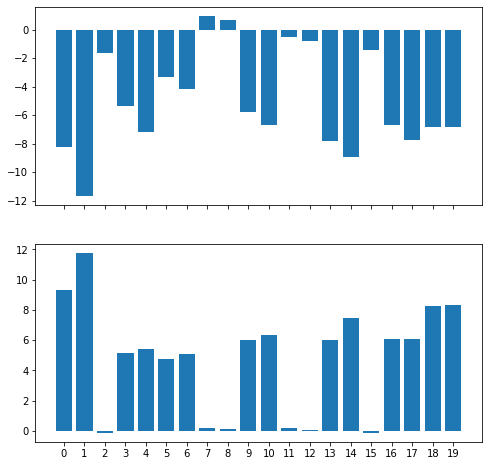

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

axes[0].bar(np.arange(len(θ)), np.log(abs(θ)))
_ = axes[0].set_xticks(np.arange(len(θ)))

axes[1].bar(np.arange(len(θ)), np.log(X.max(axis=0)))
_ = axes[1].set_xticks(np.arange(len(θ)))

Text(0, 0.5, 'max $X$')

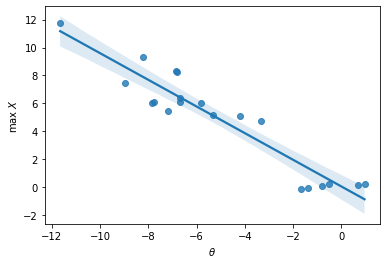

In [ ]:
sns.regplot(x=np.log(abs(θ)), y=np.log(np.max(X, axis=0)))
plt.xlabel(r'$\theta$')
plt.ylabel(r'max $X$')

## Preprocessamento

Uma melhor forma de criar o modelo é __preprocessar os dados__. Aqui, iremos considerar duas formas de normalização.

### Feature Scaling

A maneira mais intuitiva de fixar a escala de várias variáveis é através de uma transformação linear,

$$\tilde{X}_{ij} = \dfrac{X_{ij} - \text{min}_{k} X_{kj}}{\text{max}_{k}X_{kj} - \text{min}_{k} X_{kj} }$$

Fixe uma feature $j$, seja $\mathbf{x} = [X_{1j}, \cdots, X_{Nj}]$. Além disso, seja $X_{ij} \in [x_{min}, x_{max}]$. Temos que 

$$\text{max}_{\ell}\tilde{X}_{\ell j} = \dfrac{\text{max}_{\ell} X_{\ell j} - \text{min}_{k} X_{kj}}{\text{max}_{k}X_{kj} - \text{min}_{k} X_{kj} } = \dfrac{x_{max} - x_{min}}{x_{max} - x_{min}} = 1$$

de modo similar,

$$\text{min}_{\ell}\tilde{X}_{\ell j} = \dfrac{\text{min}_{\ell} X_{\ell j} - \text{min}_{k} X_{kj}}{\text{max}_{k}X_{kj} - \text{min}_{k} X_{kj} } = \dfrac{x_{min} - x_{min}}{x_{max} - x_{min}} = 0$$

portanto $\tilde{x}_{\ell} \in [0, 1]$.

In [ ]:
def feature_scaling(X):
    _X = X.copy()

    # Do your magic...
    _X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    return _X

In [ ]:
X_scaled = feature_scaling(X)
print(X_scaled.min(axis=0))
print(X_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
for i in range(X.shape[1]):
    xmax = np.max(X_scaled[:, i])
    xmin = np.min(X_scaled[:, i])

    assert xmax == 1, "Expected max of feature {} to be 1, but got {}".format(i, xmax)
    assert xmin == 0, "Expected min of feature {} to be 1, but got {}".format(i, xmin)

### Standardization

Uma segunda maneira de normalizar os dados consiste em tornar os dados para que eles tenham média 0, e variância unitária,

$$\tilde{X}_{ij} = \dfrac{X_{ij} - \mu_{j}}{\sigma_{j}}$$

onde,

$$\begin{cases}\mu_{j} = \dfrac{1}{N}\sum_{i=1}^{N}X_{ij} \\ \sigma_{j} = \dfrac{1}{N^{2}}\sum_{i=1}^{N}(X_{ij}-\mu_{j})^{2} \end{cases}$$

assumindo $\sigma_{j} \neq 0$.

In [ ]:
np.mean(X, axis=0).shape

(20,)

In [ ]:
np.std(X, axis=0).shape

(20,)

In [ ]:
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [ ]:
np.mean(X_norm, axis=0)

array([-7.74855764e-17,  3.09942306e-17,  1.23976922e-16,  3.71930767e-16,
       -6.50878842e-16, -7.74855764e-17, -5.88890381e-16,  9.29826917e-17,
        1.08479807e-15,  3.09942306e-17,  9.29826917e-17, -5.81141823e-16,
       -3.09942306e-17,  1.23976922e-16, -1.23976922e-16,  2.86696633e-16,
       -6.19884611e-17, -7.74855764e-17, -3.09942306e-17,  0.00000000e+00])

In [ ]:
np.std(X_norm, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
def feature_standardization(X):
    _X = X.copy()

    # Do your magic...
    _X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    return _X

In [ ]:
X_standard = feature_standardization(X)

In [ ]:
for i in range(X.shape[1]):
    x_mean = np.mean(X_standard[:, i])
    x_std = np.std(X_standard[:, i])

    assert np.isclose(x_mean, 0), "Expected mean of feature {} to be 0, but got {}".format(i, x_mean)
    assert np.isclose(x_std, 1), "Expected std of feature {} to be 1, but got {}".format(i, x_std)

#### Questão

Faça a classificação binária com as variáveis normalizadas. Qual acurácia você conseguiu?

In [ ]:
# Feature Scaling

Xtr, Xts, ytr, yts = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = model.fit(Xtr, ytr)
yhat = model.predict(Xts)

cmat = confusion_matrix(yts, yhat)

tp = cmat[0, 0]
tn = cmat[1, 1]
fp = cmat[0, 1]
fn = cmat[1, 0]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)

print('Feature Scaling')
print('tpr = {}, tnr = {}, acc = {}'.format(tpr, tnr, acc))

Feature Scaling
tpr = 1.0, tnr = 0.8154761904761905, acc = 0.8315217391304348


In [ ]:
# Standardization

Xtr, Xts, ytr, yts = train_test_split(X_standard, y, test_size=0.2, random_state=42)
model = model.fit(Xtr, ytr)
yhat = model.predict(Xts)

cmat = confusion_matrix(yts, yhat)

tp = cmat[0, 0]
tn = cmat[1, 1]
fp = cmat[0, 1]
fn = cmat[1, 0]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)

print('Standardization')
print('tpr = {}, tnr = {}, acc = {}'.format(tpr, tnr, acc))

Standardization
tpr = 1.0, tnr = 0.8154761904761905, acc = 0.8315217391304348


## Classificação Multi-Classe

O caso anterior funciona quando o problema é de classificação binária (apenas duas classes). Para um problema de classificação com várias classes, duas estratégias são possíveis:

1. Um contra Todos (One versus All, ou OvA): nesse caso, treinamos $K$ classificadores. Cada classificador $f_{i}$ é um classificador binário, onde $1$ é o label da classe $i$, e $0$ é o label das classes $j \neq i$.
2. Um contra um (One versus One, ou OvO): nesse caso, treinamos $\dfrac{K(K-1)}{2}$ classificadores, em que cada classificador $h_{ij}$ é um classificador binário, com label $1$ para a classe $i$ e 0 para a classe $j$.

Por conta do custo computacional, a primeira estratégia é preferível em relação à segunda. Note que para $K = 5$ classes, 1. implica em criar $5$ classificadores, enquanto 2. implica em $\dfrac{5(5-1)}{2} = 10$.

### MSE OvA

Ao invés de considerar $y \in \{0, 1\}$, será interessante definirmos o conceito de __one-hot encoding__. Isso corresponde à converter valores categóricos $\{1, 2, ..., K\}$ em vetores contendo zeros e uns. Assim,
\begin{align*}
    t_{k} &= \begin{cases}
        1 & \text{ if } y = k,\\
        0 & \text{ otherwise}
    \end{cases}
\end{align*}

ou seja, temos a seguinte transformação, para $K = 3$,

$$y = 1 \mapsto \begin{bmatrix}1\\ 0\\ 0\end{bmatrix}, y = 2 \mapsto \begin{bmatrix}0\\ 1\\ 0\end{bmatrix}, y = 3 \mapsto \begin{bmatrix}0\\ 0\\ 1\end{bmatrix}$$

Note que podemos agregar os vetores $\mathbf{t}_{i}$ para formar uma matriz de rótulos $\mathbf{T} \in \mathbb{R}^{N \times K}$. Assim, as variáveis do modelo mudam levemente $\hat{\Theta} \in \mathbb{R}^{n \times K}$ e $\hat{\mathbf{b}} \in \mathbb{R}^{K}$ como novos parâmetros. These are estimated using,
$$
    \begin{cases}
        \Theta^{\star} &= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{T},\\
        \mathbf{b}^{\star} &= \hat{\mu}_{T} - \Theta^{T}\hat{\mu}_{\mathbf{x}}
    \end{cases}
$$

Note que isso é equivalente à treinar $K$ modelos MSE de acordo com a estratégia OvA. Os parâmetros $\theta_{i}^{\star}$ and $b_{i}^{\star}$, relacionados à classe $i$, podem ser identificados como as colunas da matriz $\Theta^{\star}$ e os elementos de $\mathbf{b}^{\star}$.

Agora, $\hat{\mathbf{f}}:\mathbb{R}^{p}\rightarrow\mathbb{R}^{K}$, onde cada $\hat{t}_{k} = f_{k}(\mathbf{x}_{i}) = \theta_{k}^{T}\mathbf{x}_{i} + b_{k}$, prediz um valor para a classe $k$. Podemos fazer a predição usando,
\begin{align*}
    \hat{y}_{i} &= \underset{k=1,\cdots,K}{\text{argmax}}\,\hat{t}_{k},\\
                &= \underset{k=1,\cdots,K}{\text{argmax}}\,\biggr(\hat{\Theta}^{T}\mathbf{x}_{i} + \hat{\mathbf{b}}\biggr)_{k},\\
                &= \underset{k=1,\cdots,K}{\text{argmax}}\,\hat{\theta}_{k}^{T}\mathbf{x}_{i} + \hat{b}_{k}.
\end{align*}

In [ ]:
class MSEClassifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        # Check if X and y have compatible shape
        X, y = check_X_y(X, y, multi_output=True)
        # Store classes seen during training
        self.classes_ = unique_labels(y)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        # self.θ = ...
        # self.b = ...
        
        self.θ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.b = np.mean(y, axis=0) - self.θ.T @ np.mean(X, axis=0)

        # return self

    def predict(self, X):
        # Check if X has correct shape
        X = check_array(X)

        # Check if fit fn has been called
        check_is_fitted(self)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        # Note: use the function argmax from numpy
        # to retrieve the index of a vector that has
        #
        #yhat = 1 * (np.dot(X, self.θ) + self.b > 0.0)

        yhat = X @ self.θ + self.b

        """
        yhat = np.squeeze(np.asarray(yhat))

        for i in range(len(yhat)):
          max = np.argmax(yhat[i])
          for j in range(len(yhat[0])):
            if j==max:
              yhat[i][j]=1
            else:
              yhat[i][j]=0

        yhat = yhat.astype('int')
        return yhat
        """

        return [ np.argmax(t)+1 for t in yhat ]

### Treinando o modelo

Nessa etapa nós iremos treinar o model. Para tanto, precisamos fazer o seguinte,

#### Instanciar corretamente o modelo previamente programado.

In [ ]:
model = MSEClassifier()

#### Criar matrizes de dados (X, y)

In [ ]:
data = df.values

X = data[:, 1:-1].astype(float)
y = data[:, -1].reshape(-1, 1) # OBS: OneHotEncoder only accepts 2d matrices

#### Criar matriz com One Hot Encoding

In [ ]:
onehot = OneHotEncoder()
onehot.fit(y)

T = onehot.transform(y)

#### Dividir os dados em treino e teste

Como o número de amostras à nossa disposição é limitado, precisamos separar os dados em um conjunto de __treino__ e um conjunto de __testes__. Isso tem por motivo verificar o comportamento do modelo num conjunto de dados estatisticamente independente do conjunto de treino. Essa etapa está relacionada ao conceito de [generalização](https://en.wikipedia.org/wiki/Generalization_error) em Machine Leanring, que será abordado em aulas futuras.

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X_standard, T, test_size=0.2, random_state=42)

#### Chamar a função .fit

In [ ]:
model.fit(Xtr, ytr)

#### Predição

In [ ]:
yhat = model.predict(Xts)
yhat[0]
yts = [ np.argmax(t)+1 for t in yts ]

### Avaliando o modelo

In [ ]:
acc = accuracy_score(yts, yhat)
cmat = confusion_matrix(yts, yhat)
acc

0.5760869565217391

### Exercícios

#### Exercício 1

Plote a matriz de confusão. Que classes tem maior confusão?

Text(0.5, 15.0, 'Classe Predita')

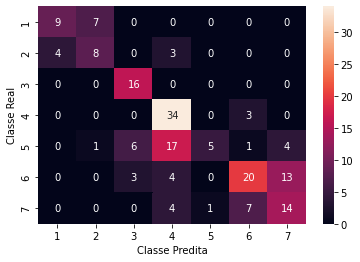

In [ ]:
ax = sns.heatmap(cmat.astype(int), annot=True, fmt='g')

_ = ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7'])
_ = ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7'], rotation=90)

ax.set_ylabel('Classe Real')
ax.set_xlabel('Classe Predita')

maior confusão: \
classes 1 e 2 \
classes 4 e 5 \
classes 6 e 7

#### Exercício 2

Calcule a acurácia do modelo em cada classe (número de predições corretas na classe, dividido pelo número de elementos na classe).

In [ ]:
def metricas(c):
  total = sum(sum(cmat))
  tp = cmat[c,c]
  tn = total - cmat.sum(axis=0)[c] - cmat.sum(axis=1)[c] + tp
  fp = cmat.sum(axis=0)[c] - tp
  fn = cmat.sum(axis=1)[c] - tp

  tpr = tp / (tp + fn)
  tnr = tn / (tn + fp)
  acc = (tp + tn) / (tp + tn + fp + fn)

  print('Classe {}: tpr = {:.3f}, tnr = {:.3f}, acc = {:.3f}'.format(c+1, tpr, tnr, acc))

for i in range(7):
  metricas(i)


Classe 1: tpr = 0.562, tnr = 0.976, acc = 0.940
Classe 2: tpr = 0.533, tnr = 0.953, acc = 0.918
Classe 3: tpr = 1.000, tnr = 0.946, acc = 0.951
Classe 4: tpr = 0.919, tnr = 0.810, acc = 0.832
Classe 5: tpr = 0.147, tnr = 0.993, acc = 0.837
Classe 6: tpr = 0.500, tnr = 0.924, acc = 0.832
Classe 7: tpr = 0.538, tnr = 0.892, acc = 0.842
